In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
#The data doesnot has a header hence adding it manually

columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']
pima_df = pd.read_csv(r"C:\Users\SivaPC\Desktop\AI_ML_GL\jupyter\practice\1-Week\pima-indians-diabetes (1).data",
                     names=columns)
pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


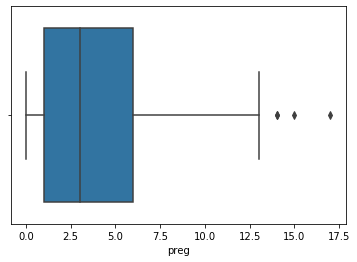

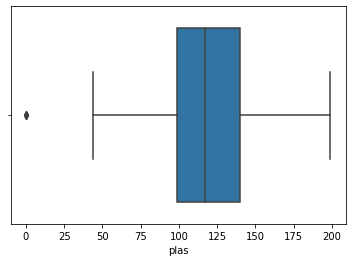

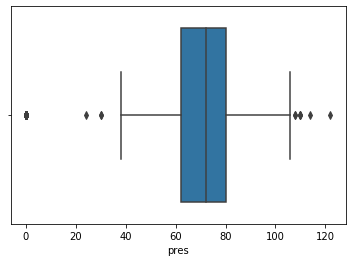

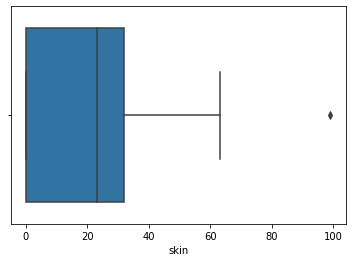

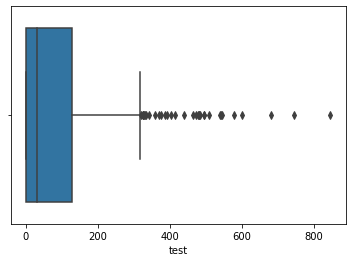

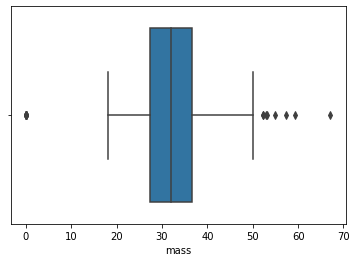

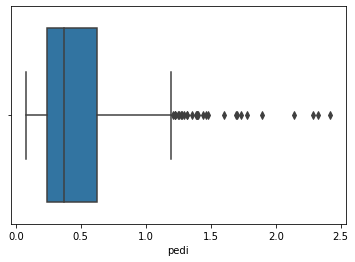

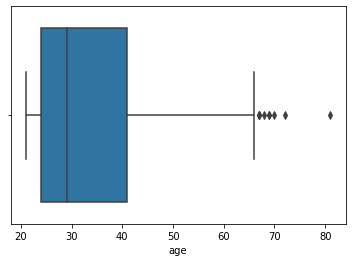

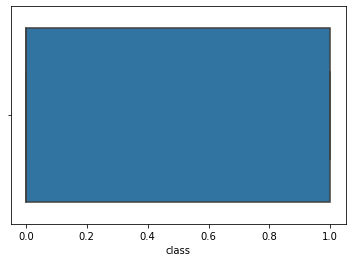

In [8]:
for column in pima_df.columns:
    sns.boxplot(pima_df.loc[:,column])
    plt.show()

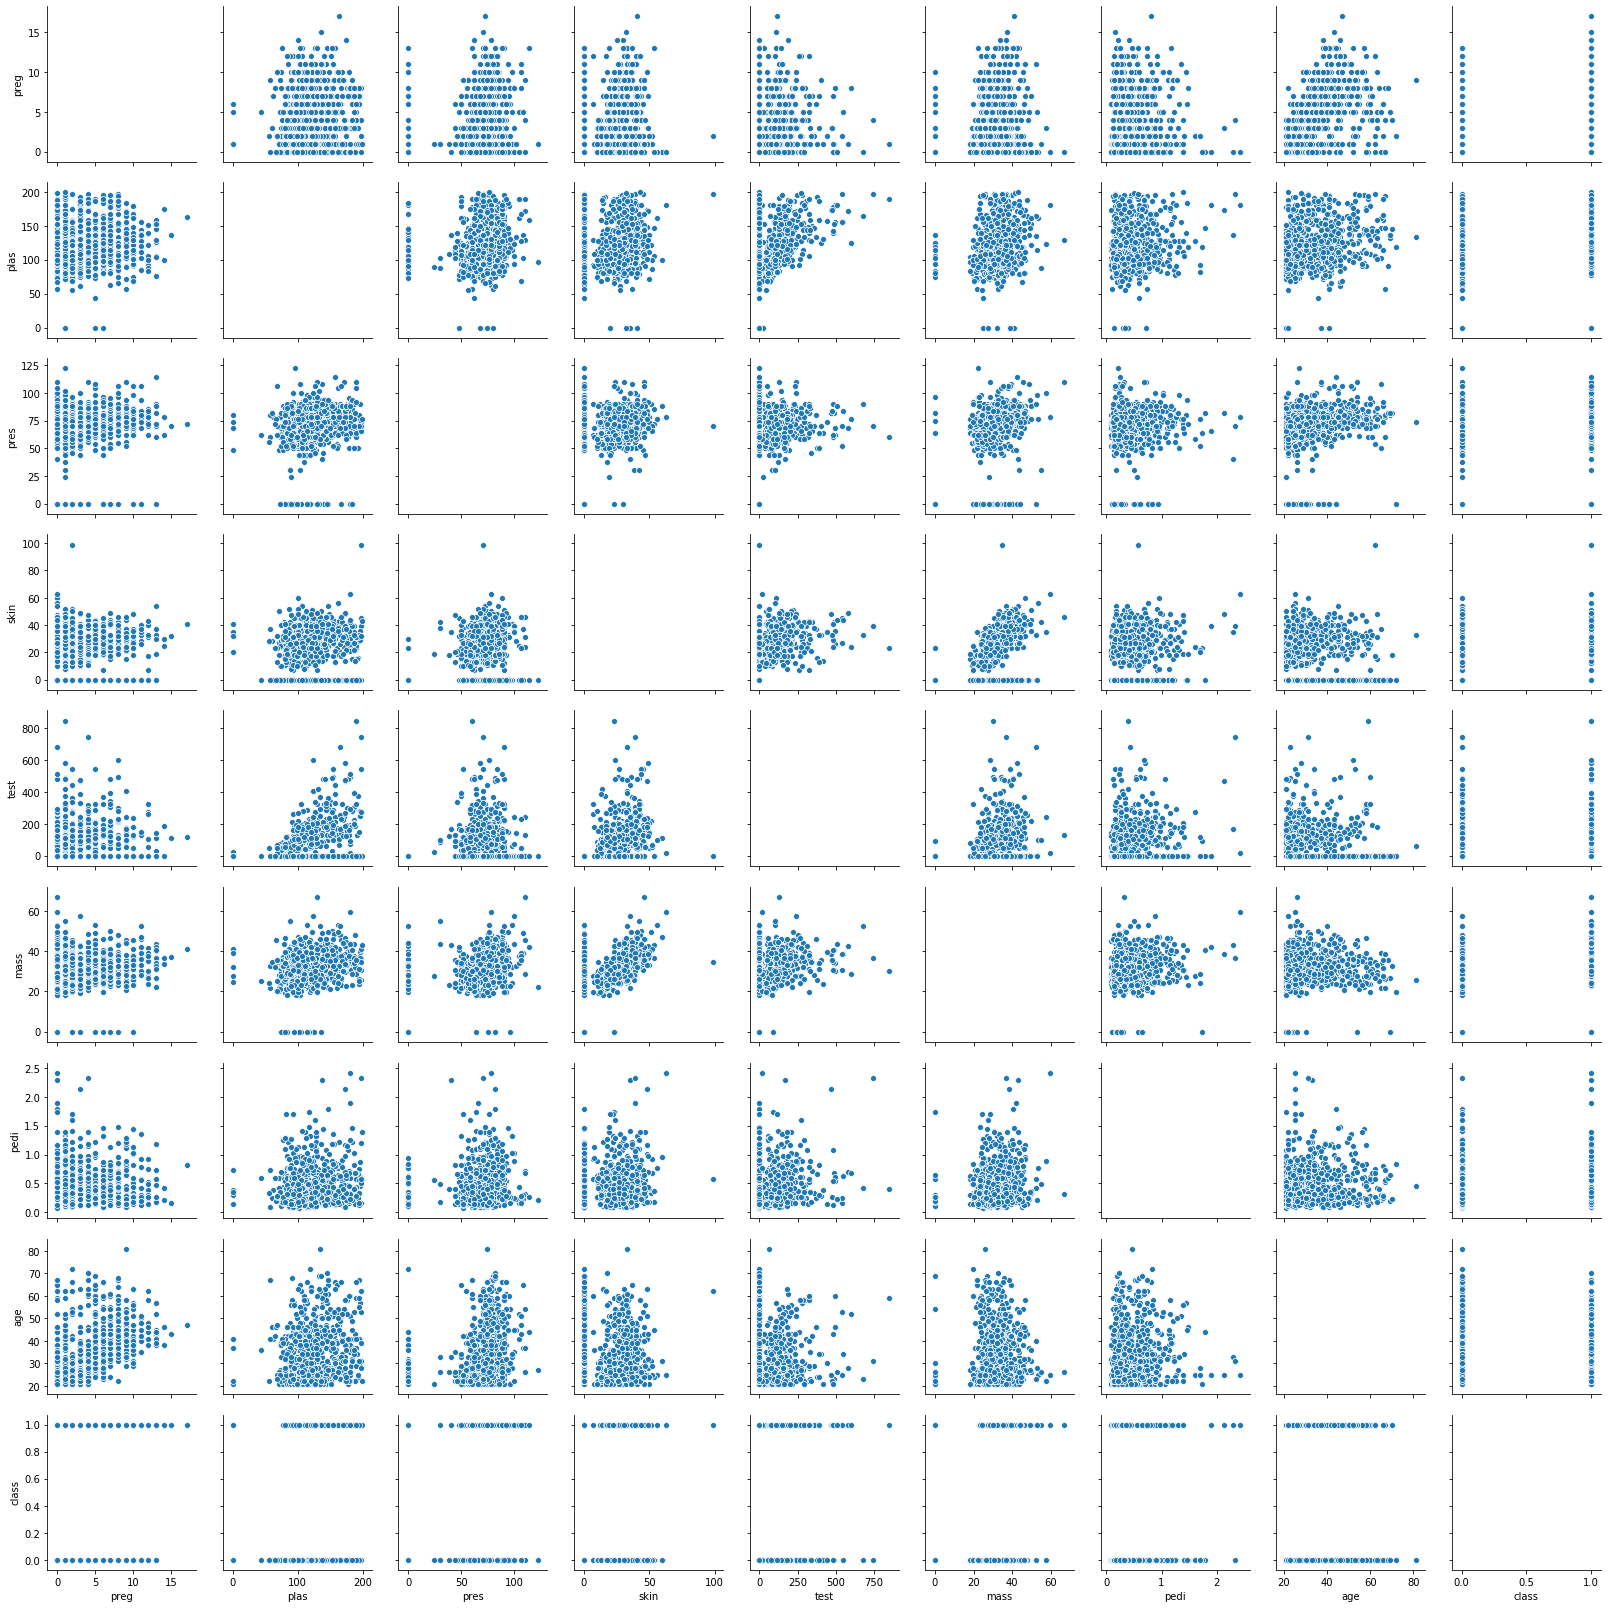

In [9]:
sns.pairplot(pima_df,diag_kind='hue')

In [10]:
# check if the number of records in class 1 class 0 are relatively equal
pima_df['class'].value_counts()
#diabatic is severly undersupplied

0    500
1    268
Name: class, dtype: int64

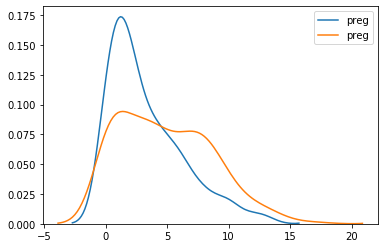

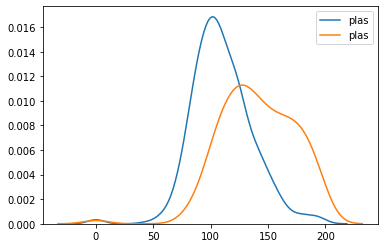

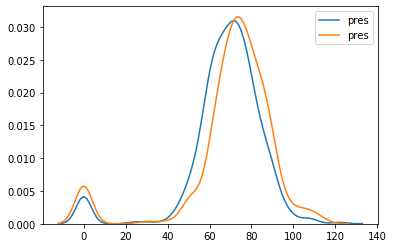

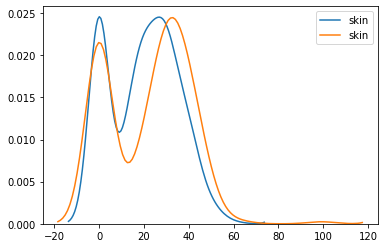

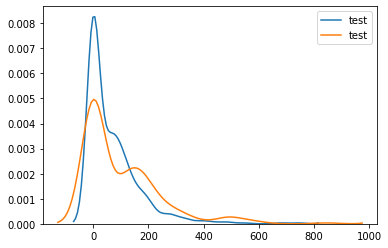

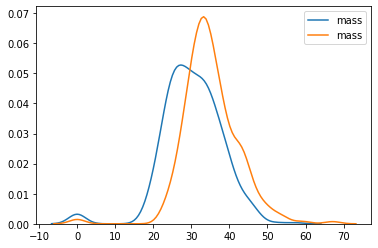

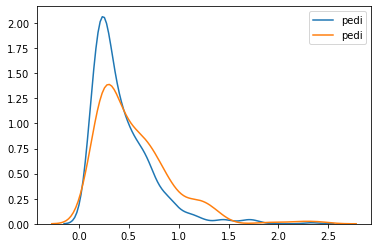

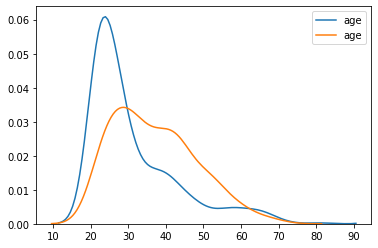

D:\IT\Apps\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\IT\Apps\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


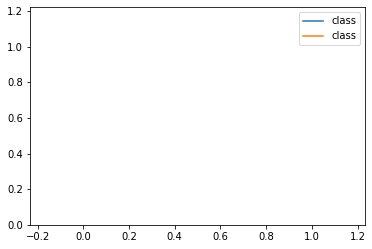

In [11]:
for column in pima_df.columns:
    sns.kdeplot(pima_df.loc[pima_df['class']==0,column])
    sns.kdeplot(pima_df.loc[pima_df['class']==1,column])
    plt.show()

In [12]:
X = pima_df.drop(columns='class')
y = pima_df['class']

test_size = 0.30
seed=1
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size,random_state=seed)

In [13]:
#Model Generation
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_predict = log_model.predict(X_test)


column_names = list(X_train.columns)

coef_df = pd.DataFrame(log_model.coef_,columns=column_names)
coef_df['intercept'] = log_model.intercept_
print(coef_df)

D:\IT\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


       preg      plas      pres      skin     test      mass      pedi  \
0  0.094378  0.025543 -0.019857 -0.001549 -0.00007  0.056306  0.389516   

        age  intercept  
0  0.008663  -5.058842  


In [15]:
model_score=log_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))

0.7748917748917749
[[132  14]
 [ 38  47]]


# Accuracy

In [17]:
metrics.accuracy_score(y_test,y_predict)

0.7748917748917749

# Confusion Matrix

In [19]:
metrics.confusion_matrix(y_test,y_predict)

array([[132,  14],
       [ 38,  47]], dtype=int64)

# Precision , Recall and f1-score

In [22]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



## Average Precision Score

In [23]:
metrics.average_precision_score(y_test,y_predict)

0.5905388086680275

## _Lets give it a new try to give better results_